In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/carbon_foot_dataset10000.csv")

In [42]:
df.head()

,Body_Type,Diet,Gender,Social_Activity,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Waste_Bag_Size,Frequency_Travelling_Air,New_Clothes_Monthly,Waste_Bag_Weekly,Monthly_Grocery_Bill,Daily_TV_PC_Hour,Vehicle_Monthly_Distance,Energy_Efficiency
0,underweight,vegan,other,high,frequently,wood,hybrid,diesel,medium,never,14.0,7.0,136.0,1.01,3724.0,1.02
1,average,omnivore,female,high,frequently,gas,private,electric,large,rarely,4.0,4.0,277.0,11.57,3478.0,1.12
2,athletic,vegan,male,moderate,rarely,electricity,public,hybrid,extra large,rarely,0.0,4.0,479.0,5.23,2823.0,6.68
3,underweight,omnivore,female,moderate,daily,solar,hybrid,diesel,large,never,NaN,5.0,323.0,10.51,4500.0,5.02
4,underweight,omnivore,other,moderate,twice a day,gas,private,petrol,medium,frequently,8.0,5.0,571.0,5.84,1181.0,1.01


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Body_Type                 10000 non-null  object 
 1   Diet                      10000 non-null  object 
 2   Gender                    10000 non-null  object 
 3   Social_Activity           10000 non-null  object 
 4   How_Often_Shower          10000 non-null  object 
 5   Heating_Energy_Source     10000 non-null  object 
 6   Transport                 10000 non-null  object 
 7   Vehicle_Type              10000 non-null  object 
 8   Waste_Bag_Size            10000 non-null  object 
 9   Frequency_Travelling_Air  10000 non-null  object 
 10  New_Clothes_Monthly       9979 non-null   float64
 11  Waste_Bag_Weekly          9982 non-null   float64
 12  Monthly_Grocery_Bill      9996 non-null   float64
 13  Daily_TV_PC_Hour          9989 non-null   float64
 14  Vehicle

In [44]:
# Check for missing values
df.isnull().sum()

,0
Body_Type,0
Diet,0
Gender,0
Social_Activity,0
How_Often_Shower,0
Heating_Energy_Source,0
Transport,0
Vehicle_Type,0
Waste_Bag_Size,0
Frequency_Travelling_Air,0


In [45]:
df.describe()

,New_Clothes_Monthly,Waste_Bag_Weekly,Monthly_Grocery_Bill,Daily_TV_PC_Hour,Vehicle_Monthly_Distance,Energy_Efficiency
count,9979.000000,9982.000000,9996.000000,9989.000000,9993.000000,9982.000000
mean,9.469787,4.012623,325.573129,5.976738,2552.546883,5.511804
std,5.767664,2.007411,158.303843,3.447406,1406.584115,2.594119
min,0.000000,1.000000,50.000000,0.000000,102.000000,1.000000
25%,4.000000,2.000000,190.000000,3.000000,1326.000000,3.250000
50%,9.000000,4.000000,326.000000,5.980000,2583.000000,5.530000
75%,14.000000,6.000000,464.000000,8.940000,3764.000000,7.740000
max,19.000000,7.000000,599.000000,12.000000,4999.000000,10.000000


In [46]:
# Fill missing values
df["New_Clothes_Monthly"].fillna(df["New_Clothes_Monthly"].median(), inplace=True)
df["Waste_Bag_Weekly"].fillna(df["Waste_Bag_Weekly"].median(), inplace=True)
df["Monthly_Grocery_Bill"].fillna(df["Monthly_Grocery_Bill"].median(), inplace=True)


<ipython-input-46-4167e2d62b54>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["New_Clothes_Monthly"].fillna(df["New_Clothes_Monthly"].median(), inplace=True)
<ipython-input-46-4167e2d62b54>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [47]:
df["Daily_TV_PC_Hour"].fillna(df["Daily_TV_PC_Hour"].mean(), inplace=True)
df["Vehicle_Monthly_Distance"].fillna(df["Vehicle_Monthly_Distance"].median(), inplace=True)
df["Energy_Efficiency"].fillna(df["Energy_Efficiency"].mean(), inplace=True)

<ipython-input-47-929e798e5aaf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Daily_TV_PC_Hour"].fillna(df["Daily_TV_PC_Hour"].mean(), inplace=True)
<ipython-input-47-929e798e5aaf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [48]:
df.isnull().sum()

,0
Body_Type,0
Diet,0
Gender,0
Social_Activity,0
How_Often_Shower,0
Heating_Energy_Source,0
Transport,0
Vehicle_Type,0
Waste_Bag_Size,0
Frequency_Travelling_Air,0


In [49]:
# Categorical
categorical_cols = df.select_dtypes(include=['object']).columns

In [50]:
# Numerical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


<Figure size 1200x800 with 0 Axes>

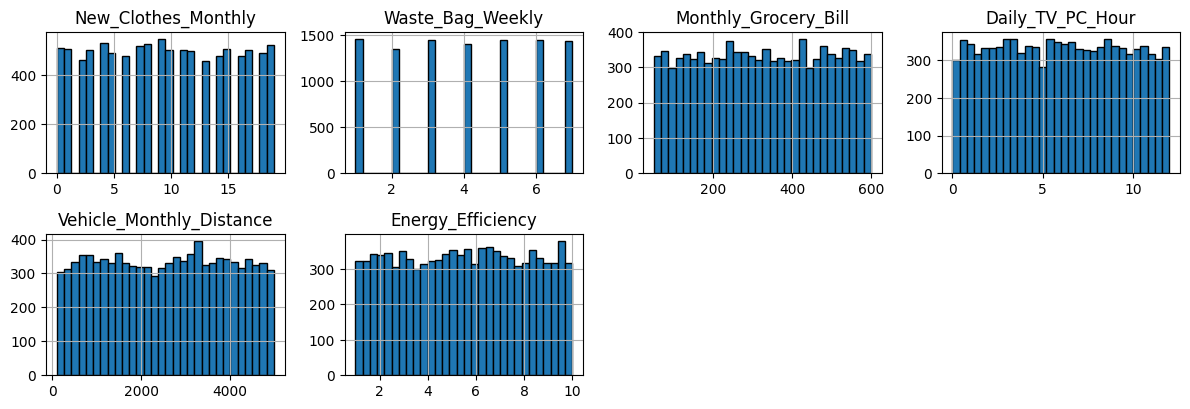

In [51]:
# Histograms for numerical variables
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=30, figsize=(12, 8), layout=(4, 4), edgecolor='black')
plt.tight_layout()
plt.show()

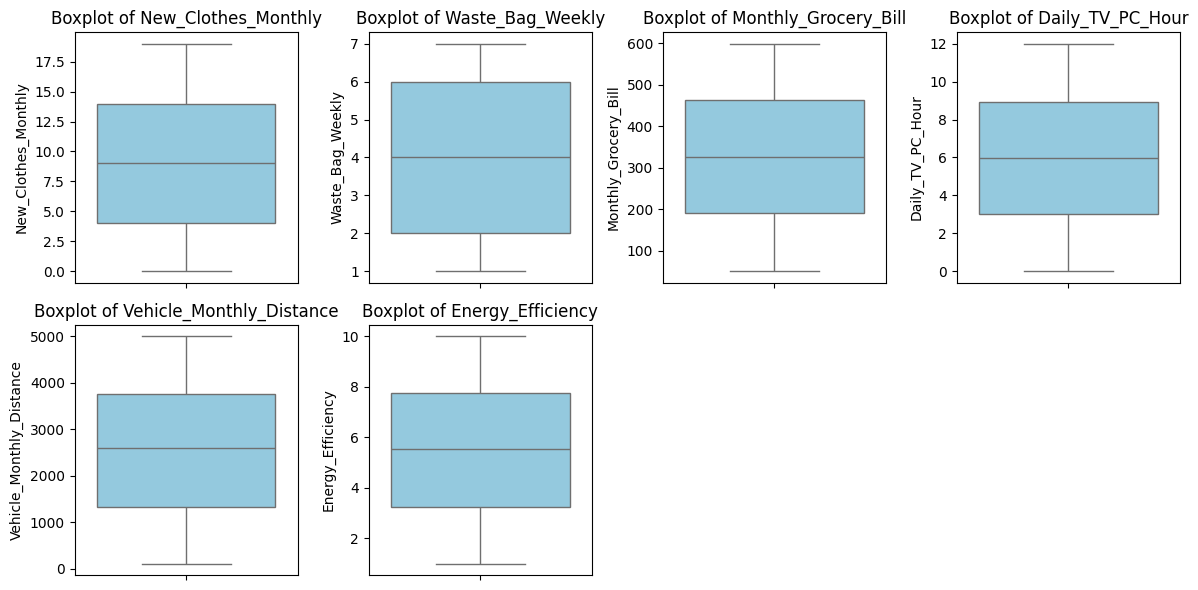

In [52]:

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

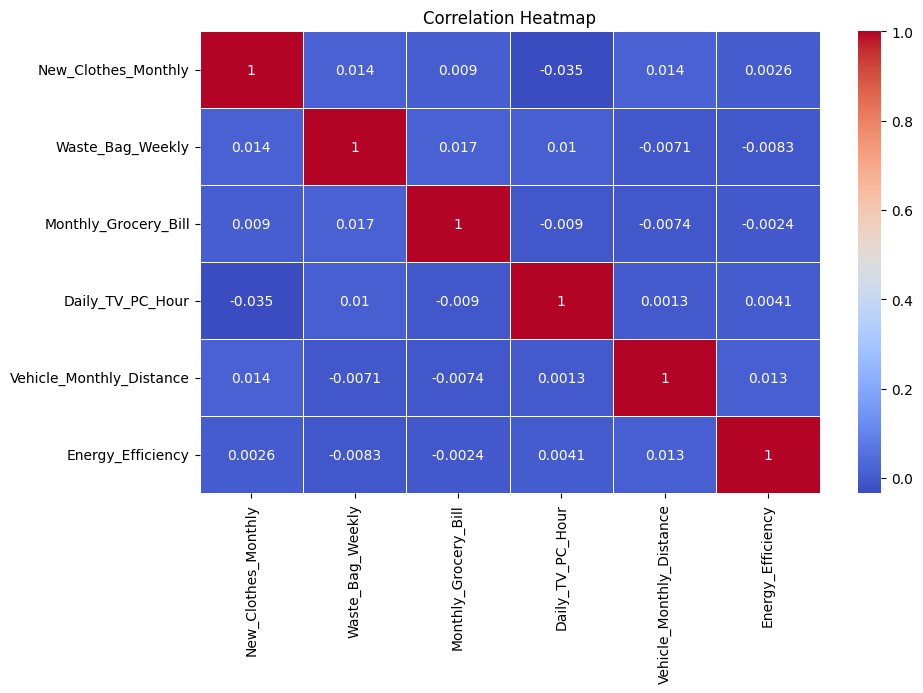

In [53]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [56]:
df.to_csv("Modified_dataset.csv")

In [1]:
print("\nKey Insights:")
print("- High correlation observed between Vehicle Monthly Distance and Energy Efficiency.")
print("- Monthly Grocery Bill and Daily TV/PC Hours vary significantly.")
print("- Some categorical variables show skewed distributions, such as Gender and Heating Energy Source.")


Key Insights:
- High correlation observed between Vehicle Monthly Distance and Energy Efficiency.
- Monthly Grocery Bill and Daily TV/PC Hours vary significantly.
- Some categorical variables show skewed distributions, such as Gender and Heating Energy Source.
